### Cluter Analysis

In [21]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## library versions
print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)
print('seaborn version:', sns.__version__)

pandas version: 1.4.2
numpy version: 1.21.5
seaborn version: 0.11.2


In [42]:
## load dataset
df = pd.read_csv("als_data.csv")
df.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


### 1. Remove any data that is not relevant to the patient's ALS condition.

In [43]:
## drop ID columns
df.drop('ID', axis=1, inplace=True)
df.drop('SubjectID', axis=1, inplace=True)

In [44]:
df.head()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_median,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,...,145.5,143.0,0.017422,8,7.0,7,0.002646,6.0,6.0,6.0
1,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,...,138.0,136.0,0.010453,8,7.0,5,0.005386,7.0,5.0,5.0
2,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,...,143.0,140.0,0.008929,5,0.0,0,0.008929,6.0,5.0,5.0
3,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,...,139.0,138.0,0.012469,5,5.0,3,0.004988,7.0,6.0,5.0
4,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,...,140.0,138.0,0.008292,6,4.0,1,0.008489,6.0,5.0,5.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2223 entries, 0 to 2222
Data columns (total 99 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age_mean                          2223 non-null   int64  
 1   Albumin_max                       2223 non-null   float64
 2   Albumin_median                    2223 non-null   float64
 3   Albumin_min                       2223 non-null   float64
 4   Albumin_range                     2223 non-null   float64
 5   ALSFRS_slope                      2223 non-null   float64
 6   ALSFRS_Total_max                  2223 non-null   int64  
 7   ALSFRS_Total_median               2223 non-null   float64
 8   ALSFRS_Total_min                  2223 non-null   int64  
 9   ALSFRS_Total_range                2223 non-null   float64
 10  ALT.SGPT._max                     2223 non-null   float64
 11  ALT.SGPT._median                  2223 non-null   float64
 12  ALT.SG

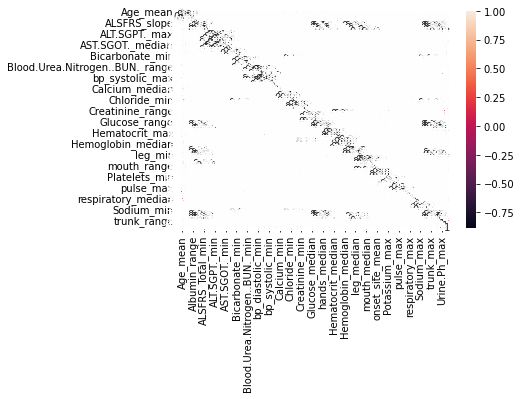

In [9]:
## correlation matrix
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [22]:
df.shape

(2223, 99)

In [24]:
df.describe()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_median,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
count,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,...,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000
mean,54.550157,47.011134,43.952542,40.766347,0.013779,-0.728274,31.692308,27.104926,19.877193,0.026035,...,140.145254,136.755061,0.015000,6.203779,4.893387,2.955915,0.007136,6.820450,5.710639,5.183221
std,11.396546,3.233980,2.654804,3.193087,0.009567,0.622329,5.314228,6.633643,8.583509,0.016156,...,1.789886,2.715247,0.009283,1.747660,2.146076,2.358095,0.004503,0.932141,0.625039,0.437222
min,18.000000,37.000000,34.500000,24.000000,0.000000,-4.345238,11.000000,2.500000,0.000000,0.000000,...,128.000000,112.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000
25%,47.000000,45.000000,42.000000,39.000000,0.009042,-1.086310,29.000000,23.000000,14.000000,0.014035,...,139.000000,135.000000,0.010582,5.000000,3.000000,1.000000,0.003643,6.000000,5.000000,5.000000
50%,55.000000,47.000000,44.000000,41.000000,0.012111,-0.620748,33.000000,28.000000,20.000000,0.023297,...,140.000000,137.000000,0.013123,7.000000,5.000000,3.000000,0.006920,7.000000,6.000000,5.000000
75%,63.000000,49.000000,46.000000,43.000000,0.015873,-0.283832,36.000000,32.000000,27.000000,0.034799,...,141.000000,138.000000,0.017278,8.000000,6.500000,5.000000,0.009639,7.000000,6.000000,5.000000
max,81.000000,70.300000,51.100000,49.000000,0.243902,1.207011,40.000000,40.000000,40.000000,0.117647,...,146.500000,145.000000,0.142857,8.000000,8.000000,8.000000,0.042017,9.000000,9.000000,8.000000


In [25]:
len(df['Age_mean'].unique())

61

In [27]:
len(df['Albumin_max'].unique())

104

In [28]:
len(df['Albumin_median'].unique())

107

In [29]:
len(df['Albumin_min'].unique())

106

In [30]:
len(df['Albumin_range'].unique())

1051

In [31]:
len(df['Sodium_range'].unique())

996

In [33]:
len(df['Chloride_range'].unique())

992

In [32]:
len(df['trunk_range'].unique())

791

#### Observation
The range fields have significant more variance than the other fields. While they're not overwhelmingly unique to each participant, they have a more unique presence than the mean/median/min/max values. 

In [45]:
df.drop('Albumin_range', axis=1, inplace=True)
df.drop('ALSFRS_Total_range', axis=1, inplace=True)
df.drop('ALT.SGPT._range', axis=1, inplace=True)
df.drop('AST.SGOT._range', axis=1, inplace=True)
df.drop('Bicarbonate_range', axis=1, inplace=True)
df.drop('Blood.Urea.Nitrogen..BUN._range', axis=1, inplace=True)
df.drop('bp_diastolic_range', axis=1, inplace=True)
df.drop('bp_systolic_range', axis=1, inplace=True)
df.drop('Calcium_range', axis=1, inplace=True)
df.drop('Chloride_range', axis=1, inplace=True)
df.drop('Creatinine_range', axis=1, inplace=True)
df.drop('Glucose_range', axis=1, inplace=True)
df.drop('hands_range', axis=1, inplace=True)
df.drop('Hematocrit_range', axis=1, inplace=True)
df.drop('leg_range', axis=1, inplace=True)
df.drop('mouth_range', axis=1, inplace=True)
df.drop('Potassium_range', axis=1, inplace=True)
df.drop('pulse_range', axis=1, inplace=True)
df.drop('respiratory_range', axis=1, inplace=True)
df.drop('Sodium_range', axis=1, inplace=True)
df.drop('trunk_range', axis=1, inplace=True)

df.head()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALT.SGPT._max,ALT.SGPT._median,...,respiratory_min,Sodium_max,Sodium_median,Sodium_min,trunk_max,trunk_median,trunk_min,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,65,57.0,40.5,38.0,-0.965608,30,28.0,22,24.0,22.0,...,3,148.0,145.5,143.0,8,7.0,7,6.0,6.0,6.0
1,48,45.0,41.0,39.0,-0.921717,37,33.0,21,25.0,13.0,...,3,142.0,138.0,136.0,8,7.0,5,7.0,5.0,5.0
2,38,50.0,47.0,45.0,-0.914787,24,14.0,10,25.0,20.0,...,4,145.0,143.0,140.0,5,0.0,0,6.0,5.0,5.0
3,63,47.0,44.0,41.0,-0.598361,30,29.0,24,62.0,60.0,...,3,143.0,139.0,138.0,5,5.0,3,7.0,6.0,5.0
4,63,47.0,45.5,42.0,-0.444039,32,27.5,20,38.0,26.5,...,3,143.0,140.0,138.0,6,4.0,1,6.0,5.0,5.0


### 2. Apply a standard scaler to the data. 

In [35]:
## import library
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
 
standardized = scaler.fit_transform(df)
print("Standardized Features:\n", standardized[:78])

Standardized Features:
 [[ 0.91713698  3.08941722 -1.30078105 ... -0.88037551  0.46305355
   1.86853157]
 [-0.57487867 -0.62201561 -1.11240084 ...  0.1926645  -1.13720768
  -0.41915124]
 [-1.45253494  0.92441474  1.14816173 ... -0.88037551 -1.13720768
  -0.41915124]
 ...
 [ 1.18043386 -0.62201561 -1.11240084 ...  0.1926645   0.46305355
  -0.41915124]
 [ 0.39054322 -0.00344347 -0.35887998 ...  0.1926645  -1.13720768
  -0.41915124]
 [-0.39934742 -0.00344347  0.20626066 ... -0.88037551 -1.13720768
  -0.41915124]]


### 3. Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.

In [38]:
## import additional libraries
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [47]:
pca = PCA(2)
 
#Transform the data
df2 = pca.fit_transform(df)
 
df2.shape

(2223, 2)

In [70]:
kmeans = KMeans(n_clusters= 7)
label = kmeans.fit_predict(df)
 
print(label)

[1 6 1 ... 2 3 0]


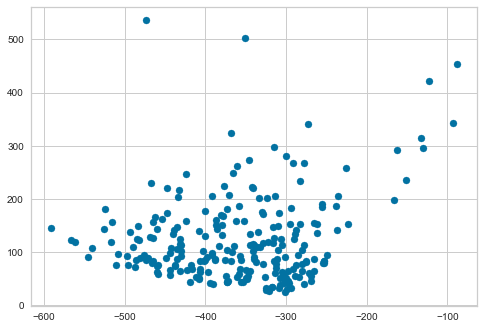

In [71]:
filtered_label0 = df2[label == 0]
 
## plot
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

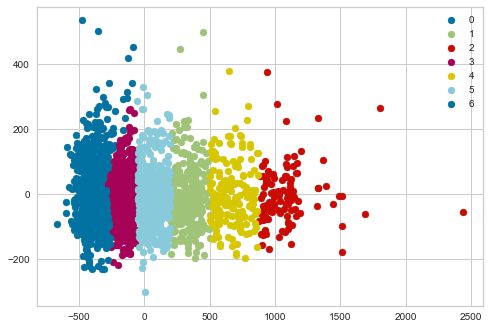

In [72]:
## all plot
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df2[label == i , 0] , df2[label == i , 1] , label = i)
plt.legend()
plt.show()

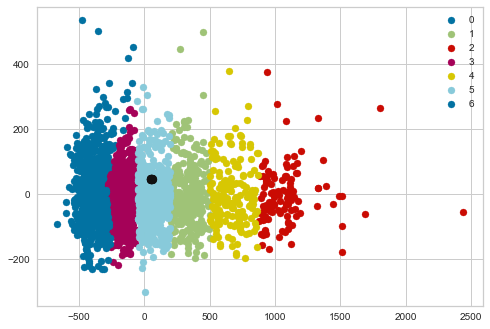

In [73]:
## plot centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df2[label == i , 0] , df2[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [83]:
print(f'Silhouette Score: {silhouette_score(df2, label)}')

Silhouette Score: 0.3627250977809936


### 4. Use the plot created in (3) to choose an optimal number of clusters for K-means. Justify your choice

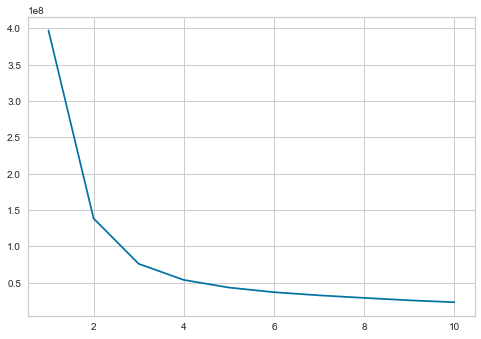

In [89]:
wcss = []

for i in range(1, 11):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(df2)
    wcss.append(clustering.inertia_)
    
ks = [ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = ks, y = wcss);

Based on the above elbow plot, our data appears to cluster at 4.

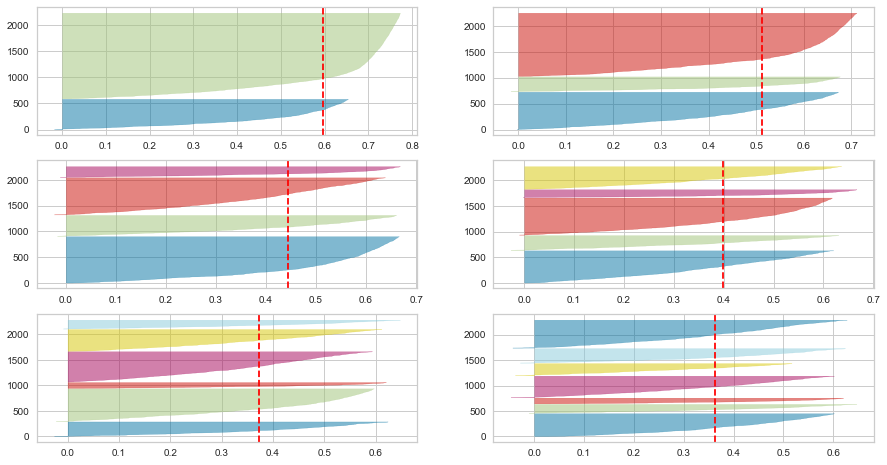

In [92]:
## import additional libraries

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer
  
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5, 6, 7]:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df2) 

Visually, the sillhouette scores do not appear consistent. While the elbow score indicates 3 would be optimal, the sillhouette visualization of 3/4 clusters has a high variability. On the contrary, the size distortion decreases as the clusters increases. While 7 is not wholly uniform, it is the closest of the options. I feel as thought the sillhouette offers a more complete guidance on the number of clusters. 

### 5. Fit a K-Means model to the data with the optimal number of clusters chosen in (4).  
** completed in earlier step **

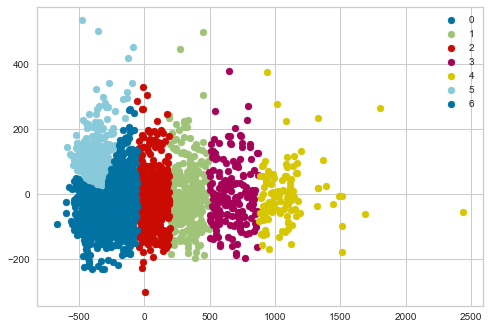

In [94]:
## all plot
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df2[label == i , 0] , df2[label == i , 1] , label = i)
plt.legend()
plt.show()

### 6. Fit a PCA transformation with two features to the scaled data. 

In [101]:
## import additional library
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df2)

In [103]:
principal_Df = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [104]:
principal_Df.head()

,principal component 1,principal component 2
0,342.448354,-137.816705
1,-341.982581,21.963924
2,498.926605,-62.593579
3,-317.547109,-19.159624
4,1083.984978,92.445683


In [105]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.94899842 0.05100158]


### 7. Make a scatterplot of the PCA transformed data coloring each point by its cluster value

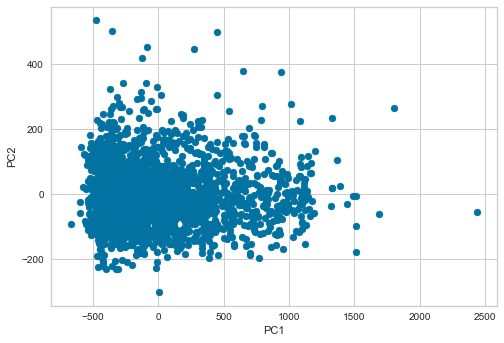

In [117]:
plt.scatter(principalComponents[:,0], principalComponents[:,1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### 8. Summarize your results and make a conclusion. 
This was a very challenging assignment. Despite working in descriptive analytics regularly, doing this work without a target was difficult, especially when bringing in the PCA. What I found most interesting was the inconsistency between the elbow method and the sillhouette for suggested number of clusters. While I did drop several columns, it makes me wonder if I was meant to drop additional columns and how that would best be done without a target. Referencing the Applied Predictive Analytics text on variable selection, all of the comparison types referenced input versus a target, which didn't suit this type of analysis. Historically, I've understood that if the number of unique values aligns closely to the total number of rows, the field is less likely to indicate anything, as it's too unique to the row.

Overall, this was an interesting exercise and look at navigating more realistic data with such a magnitude of fields. It does make me appreciate having a business knowledge or partners at work to better navigate datasets though! While dropping redundant fields through analysis is a more objective approach, prior business knowledge helps with the gray spaces of relevancy. 